# Proyecto Tensorflow Keras


# Modelo1

In [ ]:
import tensorflow as tf




if tf.test.is_gpu_available():
    print("¡Genial! Keras usará la GPU automáticamente.")
else:
    print("¡Problema! La GPU no está disponible para TensorFlow.")

Versión de TensorFlow: 2.18.0
Dispositivos GPU disponibles: []
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
¡Problema! La GPU no está disponible para TensorFlow.


Dividimos el dataset de cifar10 en 3 conjuntos distinitos(entrenamiento,validacion y test)

In [2]:
import keras
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,train_size=0.7,random_state=42)




Definimos la estructura de la red convolucional

In [4]:
inputs = keras.Input(shape=(32, 32, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [5]:
model.summary(line_length=80)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)          │ (None, 32, 32, 3)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ rescaling (Rescaling)             │ (None, 32, 32, 3)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d (Conv2D)                   │ (None, 30, 30, 32)       │           896 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 15, 15, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 13, 13, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 6, 6, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)                 │ (None, 4, 4, 128)        │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d          │ (None, 128)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 94,538 (369.29 KB)

 Trainable params: 94,538 (369.29 KB)

 Non-trainable params: 0 (0.00 B)

Compilamos el modelo

In [6]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [7]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break
reshaped_dataset = dataset.map(
    lambda x: tf.reshape(x, (4, 4)),
    num_parallel_calls=8)
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


Entrenamos el modelo

In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    x=x_train,y=y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_val,y_val),
    callbacks=callbacks,
)

Epoch 1/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.2802 - loss: 1.9124 - val_accuracy: 0.4435 - val_loss: 1.5073
Epoch 2/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4555 - loss: 1.4826 - val_accuracy: 0.5165 - val_loss: 1.3516
Epoch 3/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5289 - loss: 1.3151 - val_accuracy: 0.5691 - val_loss: 1.2263
Epoch 4/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5781 - loss: 1.1890 - val_accuracy: 0.5694 - val_loss: 1.2120
Epoch 5/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5958 - loss: 1.1329 - val_accuracy: 0.6230 - val_loss: 1.0704
Epoch 6/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6269 - loss: 1.0532 - val_accuracy: 0.6090 - val_loss: 1.1094
Epoch 7/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6555 - loss: 0.9905 - val_accuracy: 0.6515 - val_loss: 1.0036
Epoch 8/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6707 -

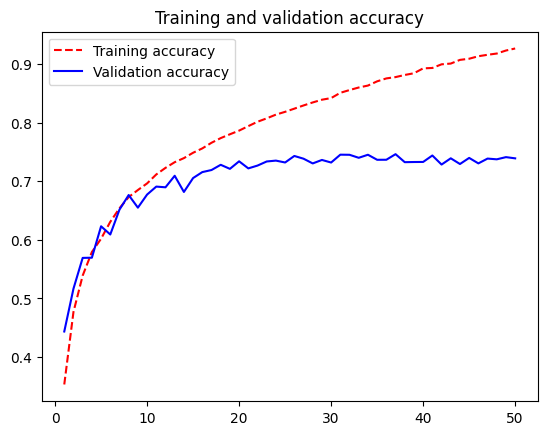

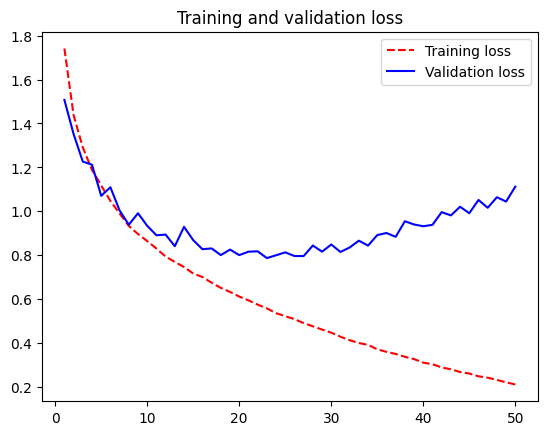

In [9]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7413 - loss: 1.1302
Test accuracy: 0.738


## Modelo

## Compilación y entrenamiento

## Evaluación

# Modelo2

## Modelo

## Compilación y entrenamiento

## Evaluación

# Modelo3

## Modelo

## Compilación y entrenamiento

## Evaluación

# Resultados